In [ ]:
!pip install -q "protobuf<4.21.3"

In [ ]:
pip install -q "google-auth-oauthlib<0.8"

In [ ]:
#pip install tensorflow==2.15.0

In [ ]:
#!pip install tensorflow

In [ ]:
pip uninstall tensorflow

In [ ]:
pip uninstall numpy

In [ ]:
pip install numpy

In [ ]:
!pip install tensorflow-io==0.35

In [ ]:
pip uninstall pandas

In [ ]:
!pip install --upgrade --force-reinstall tensorflow

In [ ]:
#pip uninstall numpy

In [ ]:
#pip install --upgrade pandas

In [ ]:
#pip install pandas==2.2.2

In [ ]:
#!pip install --upgrade pip setuptools wheel

In [ ]:
import os

In [ ]:
from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_io as tfio

# TF Model Depth

In [ ]:
yamnet_model_handel ="https://tfhub.dev/google/yamnet/1"

#Model Loading

In [ ]:
yamnet_model = hub.load(yamnet_model_handel)

# Acquiring Data Files

In [ ]:
testing_wav_file_name = tf.keras.utils.get_file('miaow_16k.wav',
                                                'https://storage.googleapis.com/audioset/miaow_16k.wav',
                                                cache_dir='./',
                                                cache_subdir='test_data')

215546/215546 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step


In [ ]:
print(testing_wav_file_name)

./test_data/miaow_16k.wav


In [ ]:
# Utility functions for loading audio files and making sure the sample rate is correct.
#@tf.function # Remove tf.function decorator
def load_wav_16k_mono(filename):
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(
          file_contents,
          desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Check if resampling is necessary
    if sample_rate != 16000:
        wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    # If sample_rate is already 16000, return without resampling
    return wav

In [ ]:
!pip install tensorflow-io==0.35.0

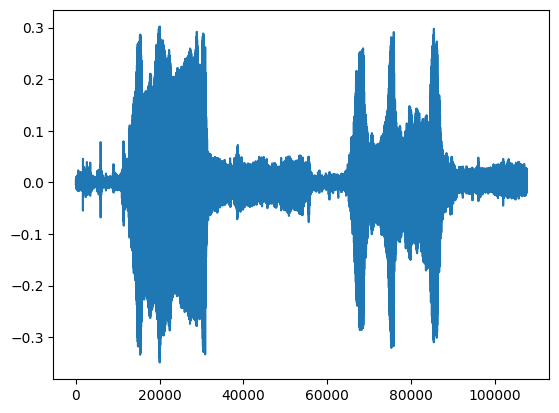

In [ ]:
testing_wav_data = load_wav_16k_mono(testing_wav_file_name)

_ = plt.plot(testing_wav_data)

# Play the audio file.
display.Audio(testing_wav_data, rate=16000)

# Load the class mapping

In [ ]:
class_map_path = yamnet_model.class_map_path().numpy().decode('utf-8')
class_names =list(pd.read_csv(class_map_path)['display_name'])

In [ ]:
for name in class_names[:20]:
  print(name)
print('...')

Speech
Child speech, kid speaking
Conversation
Narration, monologue
Babbling
Speech synthesizer
Shout
Bellow
Whoop
Yell
Children shouting
Screaming
Whispering
Laughter
Baby laughter
Giggle
Snicker
Belly laugh
Chuckle, chortle
Crying, sobbing
...


In [ ]:
scores, embeddings, spectrogram = yamnet_model(testing_wav_data)
class_scores = tf.reduce_mean(scores, axis=0)
top_class = tf.math.argmax(class_scores)
inferred_class = class_names[top_class]

print(f'The main sound is: {inferred_class}')
print(f'The embeddings shape: {embeddings.shape}')

The main sound is: Animal
The embeddings shape: (13, 1024)


In [ ]:
top_class=tf.math.argmax(class_scores)
top_class

In [ ]:
inferred_class=class_names[top_class]
inferred_class

In [ ]:
print(f'The main sound is: {inferred_class}')
print(f'The embeddings shape: {embeddings.shape}')

In [ ]:
/home/vikneshraj10/Documents/Model of SKin/app.py

# ESC-50 dataset

In [ ]:
_ = tf.keras.utils.get_file('esc-50.zip',
                        'https://github.com/karoldvl/ESC-50/archive/master.zip',
                        cache_dir='./',
                        cache_subdir='datasets',
                        extract=True)